<h3>Linear regression</h3>
<p>We start by loading the red wine's data</p>

In [35]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
#X = data[:,:11]
q = data[:,11]
print q

[ 5.  5.  5. ...,  6.  5.  6.]


In [8]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 'winequality-white.csv')
import numpy as np
with open('winequality-white.csv') as fw:
    lines_white = (line for line in fw)
    data_white = np.loadtxt(lines_white, delimiter=';', skiprows=1)
q_white = data_white[:,11]

<h4>Plotting</h4>
<p>It's useful to start with a plot. Histogram of the quality, for the red wine data.</p>

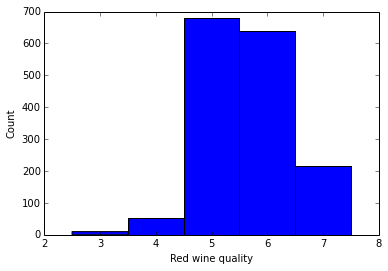

In [9]:
%matplotlib inline
import pylab as plt
plt.hist(q, bins=np.arange(q.min(), q.max()+1), align='left')
plt.xlabel('Red wine quality')
plt.ylabel('Count')

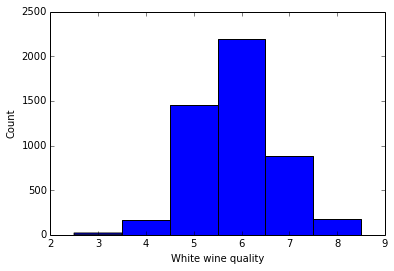

In [10]:
%matplotlib inline
import pylab as plt
plt.hist(q_white, bins=np.arange(q_white.min(), q_white.max()+1), align='left')
plt.xlabel('White wine quality')
plt.ylabel('Count')

Linear regression with minimised square loss. Mean Square Error = 0.440463653571


0.44046365357051298

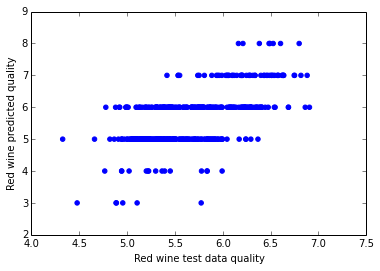

In [33]:
def fitLinearModelAndGetSquareError(showPlot):
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data)

    train = data[:int(N*0.7)]
    test = data[int(N*0.7):]
    X_train = train[:,:11]
    X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
    q_train = train[:,11]
    #data is now splitted into train and test

    from numpy.linalg import inv
    XtX = np.dot(X_train.T, X_train) 
    XtXI = inv(XtX)
    XtXIXt = np.dot(XtXI, X_train.T)
    wbar = np.dot(XtXIXt, q_train)
    #optimal values for the wbar are now found. For these values we are minimizing the Loss agianst the train data


    #now plotting the new fitted model
    X_test = test[:,:11]
    X_test = np.c_[np.ones(test.shape[0]), X_test]
    q_test = test[:,11]
    f_test = np.dot(X_test, wbar)

    meanSquareError = ((q_test-f_test)**2).mean()
    if showPlot:
        print "Linear regression with minimised square loss. Mean Square Error =", meanSquareError
        plt.scatter(f_test,q_test, color='blue')
        plt.xlabel('Red wine test data quality')
        plt.ylabel('Red wine predicted quality')
    return meanSquareError
fitLinearModelAndGetSquareError(True)

[0.43007490412332378, 0.4618313909411057, 0.39192360465047466, 0.42317183434689637, 0.41396984454872648, 0.44850689625137635, 0.49781763480453284, 0.40363170314261504, 0.41291213727435455, 0.40465431367910998, 0.40329657371552396, 0.38412437188939441, 0.37188035471268166, 0.40514258856222124, 0.38679316053294416, 0.39300874732383484, 0.46065932135369925, 0.42897337672301117, 0.45320703965780978, 0.43322744968440963, 0.37261000964170082, 0.44452261511573921, 0.42353241398246405, 0.37853278715341065, 0.44226411951086558, 0.40882556788111207, 0.47438522358138441, 0.43542517629729816, 0.41655302127596949, 0.40215261823610787, 0.45811267387961402, 0.41345943172398758, 0.46004067737409471, 0.40676100111774632, 0.44568492882684679, 0.40368879293769627, 0.42575553355889467, 0.39494140897812824, 0.44367808735980413, 0.46050840871944437, 0.42354774963593583, 0.45251194194929845, 0.41905789881163524, 0.4798202872842699, 0.39861714152881839, 0.39537714805374569, 0.43771636167686179, 0.408464119864

(array([  4.,   5.,  11.,   5.,   7.,   7.,   4.,   4.,   2.,   1.]),
 array([ 0.37188035,  0.38447408,  0.39706781,  0.40966154,  0.42225527,
         0.43484899,  0.44744272,  0.46003645,  0.47263018,  0.48522391,
         0.49781763]),
 <a list of 10 Patch objects>)

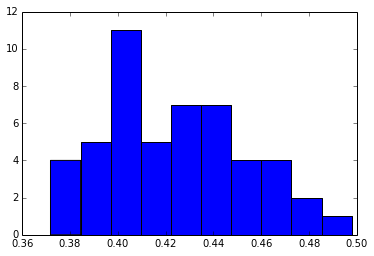

In [34]:
errors = []
for i in range(50):
    errors += [fitLinearModelAndGetSquareError(False)]
print errors
plt.hist(errors)